In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
model = keras.Sequential(
    [
        layers.Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [8]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"],
)

In [9]:
history_sgd = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.5371 - accuracy: 0.8459 - val_loss: 0.1754 - val_accuracy: 0.9483
Epoch 2/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1525 - accuracy: 0.9538 - val_loss: 0.1060 - val_accuracy: 0.9708
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1036 - accuracy: 0.9679 - val_loss: 0.0823 - val_accuracy: 0.9765
Epoch 4/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0822 - accuracy: 0.9750 - val_loss: 0.1099 - val_accuracy: 0.9645
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0644 - val_accuracy: 0.9808
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0537 - val_accuracy: 0.9835
Epoch 7/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0762 - val_ac

In [10]:
model_adam = keras.Sequential(
    [
        layers.Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [11]:
model_adam.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)


In [12]:
history_adam = model_adam.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1379 - accuracy: 0.9579 - val_loss: 0.0563 - val_accuracy: 0.9845
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 3/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.0351 - val_accuracy: 0.9905
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0413 - val_accuracy: 0.9877
Epoch 5/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0462 - val_accuracy: 0.9892
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0362 - val_accuracy: 0.9903
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0461 - val_a

In [13]:
model_rmsprop = keras.Sequential(
    [
        layers.Conv2D(32,(3,3), activation="relu", input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [14]:
model_rmsprop.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

In [15]:
history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1311 - accuracy: 0.9593 - val_loss: 0.0587 - val_accuracy: 0.9842
Epoch 2/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0427 - val_accuracy: 0.9888
Epoch 3/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0370 - val_accuracy: 0.9903
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0346 - val_accuracy: 0.9910
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0203 - accuracy: 0.9941 - val_loss: 0.0499 - val_accuracy: 0.9887
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.0336 - val_accuracy: 0.9913
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0142 - accuracy: 0.9958 - val_loss: 0.0442 - val_ac

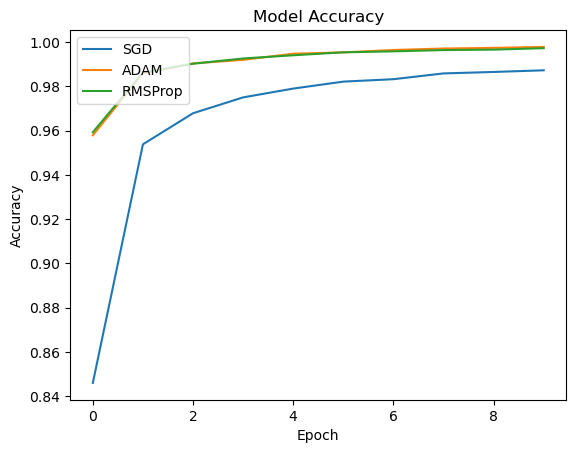

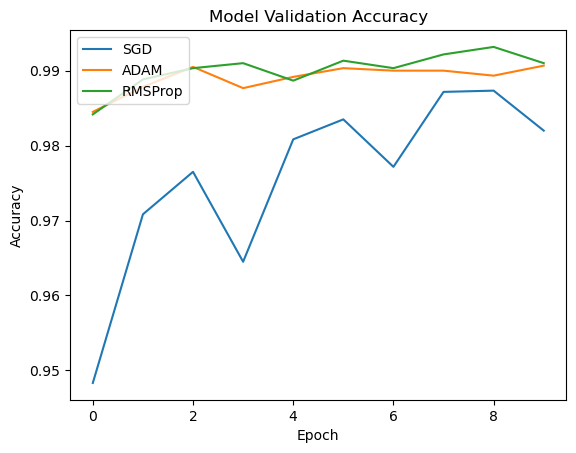

In [16]:
plt.plot(history_sgd.history["accuracy"])
plt.plot(history_adam.history["accuracy"])
plt.plot(history_rmsprop.history["accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["SGD", "ADAM", "RMSProp"], loc="upper left")
plt.show()

plt.plot(history_sgd.history["val_accuracy"])
plt.plot(history_adam.history["val_accuracy"])
plt.plot(history_rmsprop.history["val_accuracy"])
plt.title("Model Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["SGD", "ADAM", "RMSProp"], loc="upper left")
plt.show()